In [1]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 22.92 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


Processing: 100%|██████████| 3000/3000 [03:48<00:00, 13.11it/s]


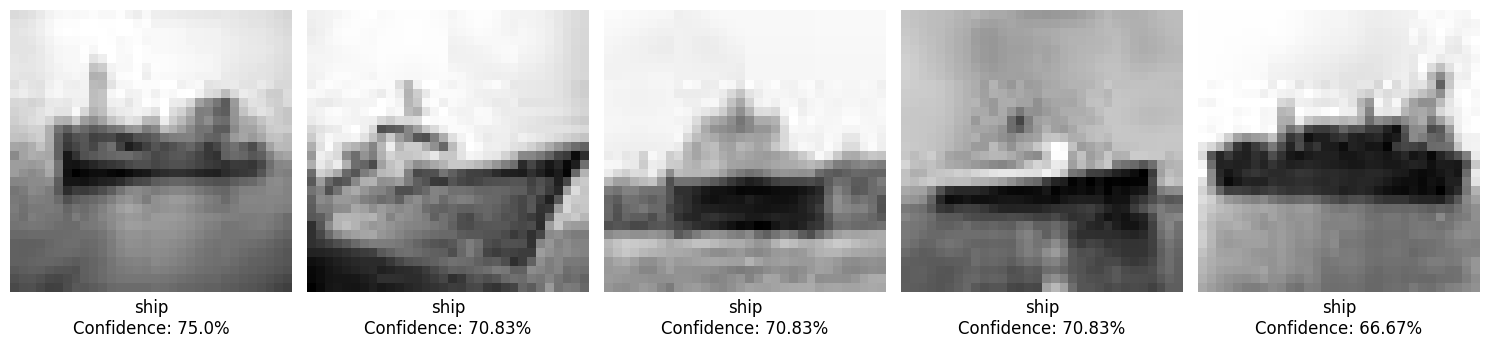

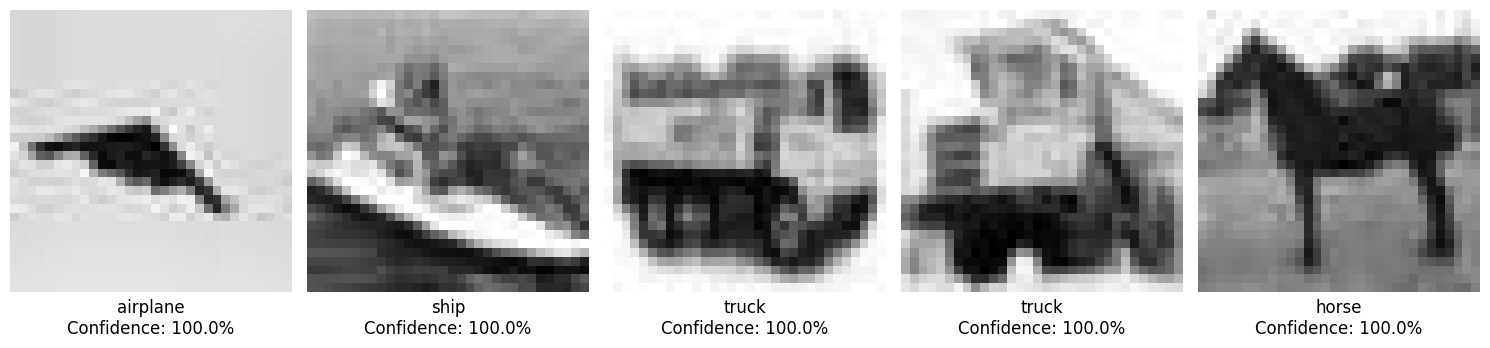

In [32]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm
from collections import Counter

def manhattan_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

def euclidean_distance(img1, img2):
    return np.linalg.norm(img1 - img2)

# Set the number of images to train on
num_images_to_train = 300

# Replace 'your_dataset_directory' with the actual path to your dataset directory
dataset_directory = 'CIFAR-10-images/test'
categories = os.listdir(dataset_directory)

img_data = []
for category in categories:
    category_dir = os.path.join(dataset_directory, category)
    images = os.listdir(category_dir)
    category_index = categories.index(category)

    for image in images[:num_images_to_train]:
        img_data.append([category_index, cv2.imread(os.path.join(category_dir, image), cv2.IMREAD_GRAYSCALE)])


random.shuffle(img_data)

k_manhattan = 24
k_euclidean = 1
best_manhattan = []
best_euclidean = []

for item in tqdm(img_data, desc='Processing'):
    image_class, img = item
    item_manhattan = []
    item_euclidean = []
    for other_item in img_data:
        other_class, other_img = other_item
        item_manhattan.append([other_class, manhattan_distance(img, other_img)])
        item_euclidean.append([other_class, euclidean_distance(img, other_img)])

    item_manhattan.sort(key=lambda r: r[1])
    item_euclidean.sort(key=lambda r: r[1])
    item_manhattan_k = [i[0] for i in item_manhattan if i[1] != 0]
    item_euclidean_k = [i[0] for i in item_euclidean if i[1] != 0]
    item_manhattan_k1 = [i for i in item_manhattan_k[:k_manhattan]]
    item_euclidean_k1 = [i for i in item_manhattan_k[:k_euclidean]]
    element_count = Counter(item_manhattan_k1)
    most_common_element, highest_occurrence = element_count.most_common(1)[0]
    if most_common_element == image_class:
        best_manhattan.append([(highest_occurrence / k_manhattan) * 100, img, image_class])
    element_count = Counter(item_euclidean_k1)
    most_common_element, highest_occurrence = element_count.most_common(1)[0]
    if most_common_element == image_class:
        best_euclidean.append([(highest_occurrence / k_euclidean) * 100, img, image_class])

best_manhattan.sort(key=lambda r: r[0], reverse=True)
best_euclidean.sort(key=lambda r: r[0], reverse=True)

top5_manhattan_per = best_manhattan[:5]
top5_euclidean_per = best_euclidean[:5]

# The code for displaying the top 5 retrieved images is the same as in your friend's code.

# Display the top 5 retrieved images using matplotlib (similar to your friend's code)
import matplotlib.pyplot as plt

images = [i[1] for i in top5_manhattan_per]
labels = [i[2] for i in top5_manhattan_per]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].text(0.5, -0.15, categories[labels[i]] + f"\nConfidence: {round(top5_manhattan_per[i][0], 2)}%", fontsize=12, ha='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

images = [i[1] for i in top5_euclidean_per]
labels = [i[2] for i in top5_euclidean_per]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].text(0.5, -0.15, categories[labels[i]] + f"\nConfidence: {round(top5_euclidean_per[i][0], 2)}%", fontsize=12, ha='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()


In [ ]:

# Define a function to calculate accuracy
def calculate_accuracy(predictions, true_labels):
    correct = sum(p == t for p, t in zip(predictions, true_labels))
    return correct / len(predictions)

# Define a function to find the K-nearest neighbors and predict the class
def find_k_nearest_neighbors(img_data, img, k, distance_function):
    item_distance = []
    for other_item in img_data:
        other_class, other_img = other_item
        item_distance.append([other_class, distance_function(img, other_img)])
    item_distance.sort(key=lambda r: r[1])
    item_k = [i[0] for i in item_distance if i[1] != 0]
    return item_k[:k]

k_values = range(1, 25)
accuracy_manhattan = []
accuracy_euclidean = []

for k in k_values:
    correct_predictions_manhattan = 0
    correct_predictions_euclidean = 0

    for item in tqdm(img_data, desc=f'K={k}'):
        img_class, img = item

        item_k_manhattan = find_k_nearest_neighbors(img_data, img, k, manhattan_distance)
        element_count = Counter(item_k_manhattan)
        most_common_element, _ = element_count.most_common(1)[0]
        if most_common_element == img_class:
            correct_predictions_manhattan += 1

        item_k_euclidean = find_k_nearest_neighbors(img_data, img, k, euclidean_distance)
        element_count = Counter(item_k_euclidean)
        most_common_element, _ = element_count.most_common(1)[0]
        if most_common_element == img_class:
            correct_predictions_euclidean += 1

    accuracy_manhattan.append(correct_predictions_manhattan / len(img_data))
    accuracy_euclidean.append(correct_predictions_euclidean / len(img_data))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_manhattan, label="Manhattan Distance")
plt.plot(k_values, accuracy_euclidean, label="Euclidean Distance")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for Different Distance Metrics")
plt.legend()
plt.grid()
plt.show()


K=1:  21%|██        | 621/3000 [00:42<03:40, 10.79it/s]